In [73]:
import pandas as pd
import numpy as np

In [74]:
# import ml classifiers
from nltk.tokenize import sent_tokenize # tokenizes sentences
from nltk.stem import PorterStemmer     # parsing/stemmer
from nltk.tag import pos_tag            # parts-of-speech tagging
from nltk.corpus import wordnet         # sentiment scores
from nltk.stem import WordNetLemmatizer # stem and context
from nltk.corpus import stopwords       # stopwords
from nltk.util import ngrams

In [75]:
df = pd.read_csv('spotify.csv').iloc[:, 1:]
df.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,...,Season,Name Length,live,love,mix,no,op,remast,version,year_y
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,...,NaN,6,0,0,0,0,0,0,0,0
1,0.643000,"['""Screamin Jay Hawkins""']",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,...,Winter,6,0,0,0,0,0,0,0,0
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,...,NaN,2,0,0,0,0,0,0,0,0
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,...,Winter,10,0,0,0,0,0,0,0,0
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,...,Fall,1,0,0,0,0,0,0,0,0


In [76]:
df.shape

(174389, 30)

In [77]:
df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,Collaboration,Name Length,live,love,mix,no,op,remast,version,year_y
count,174389.000000,174389.000000,1.743890e+05,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,...,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000,174389.000000
mean,0.499228,0.536758,2.328100e+05,0.482721,0.068135,0.197252,5.205305,0.211123,-11.750865,0.702384,...,0.215392,4.673099,0.029870,0.036034,0.024766,0.027261,0.024503,0.066145,0.024451,0.023688
std,0.379936,0.176025,1.483958e+05,0.272685,0.251978,0.334574,3.518292,0.180493,5.691591,0.457211,...,0.411095,3.301915,0.172105,0.190515,0.169057,0.174373,0.155160,0.248583,0.155371,0.152942
min,0.000000,0.000000,4.937000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087700,0.414000,1.661330e+05,0.249000,0.000000,0.000000,2.000000,0.099200,-14.908000,0.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.517000,0.548000,2.057870e+05,0.465000,0.000000,0.000524,5.000000,0.138000,-10.836000,1.000000,...,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.895000,0.669000,2.657200e+05,0.711000,0.000000,0.252000,8.000000,0.270000,-7.499000,1.000000,...,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.996000,0.988000,5.338302e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,...,1.000000,44.000000,2.000000,4.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000


In [78]:
df.columns

Index(['acousticness', 'artists', 'danceability', 'duration_ms', 'energy',
       'explicit', 'id', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'name', 'popularity', 'release_date', 'speechiness', 'tempo',
       'valence', 'year_x', 'Collaboration', 'Season', 'Name Length', 'live',
       'love', 'mix', 'no', 'op', 'remast', 'version', 'year_y'],
      dtype='object')

In [91]:
# Delete some of the columns
del df['id']
del df['release_date']
del df['artists']

In [92]:
# Change some of the column names
df = df.rename(columns={'Name Length': 'name_length'})
df.head()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,season,name_length,live,love,mix,no,op,remast,version,year_y
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,...,NaN,6,0,0,0,0,0,0,0,0
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,...,Winter,6,0,0,0,0,0,0,0,0
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,...,NaN,2,0,0,0,0,0,0,0,0
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,...,Winter,10,0,0,0,0,0,0,0,0
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,...,Fall,1,0,0,0,0,0,0,0,0


In [81]:
# Get the dummy variables for season
df1 = pd.get_dummies(df[['season']])
df1.head()

,season_Fall,season_Spring,season_Summer,season_Winter
0,0,0,0,0
1,0,0,0,1
2,0,0,0,0
3,0,0,0,1
4,1,0,0,0


In [115]:
# Create the final dataset
spotify = df.join(df1, how='outer')
spotify.head()


,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,...,mix,no,op,remast,version,year_y,season_Fall,season_Spring,season_Summer,season_Winter
0,0.991000,0.598,168333,0.224,0,0.000522,5,0.3790,-12.628,0,...,0,0,0,0,0,0,0,0,0,0
1,0.643000,0.852,150200,0.517,0,0.026400,5,0.0809,-7.261,0,...,0,0,0,0,0,0,0,0,0,1
2,0.993000,0.647,163827,0.186,0,0.000018,0,0.5190,-12.098,1,...,0,0,0,0,0,0,0,0,0,0
3,0.000173,0.730,422087,0.798,0,0.801000,2,0.1280,-7.311,1,...,0,0,0,0,0,0,0,0,0,1
4,0.295000,0.704,165224,0.707,1,0.000246,10,0.4020,-6.036,0,...,0,0,0,0,0,0,1,0,0,0


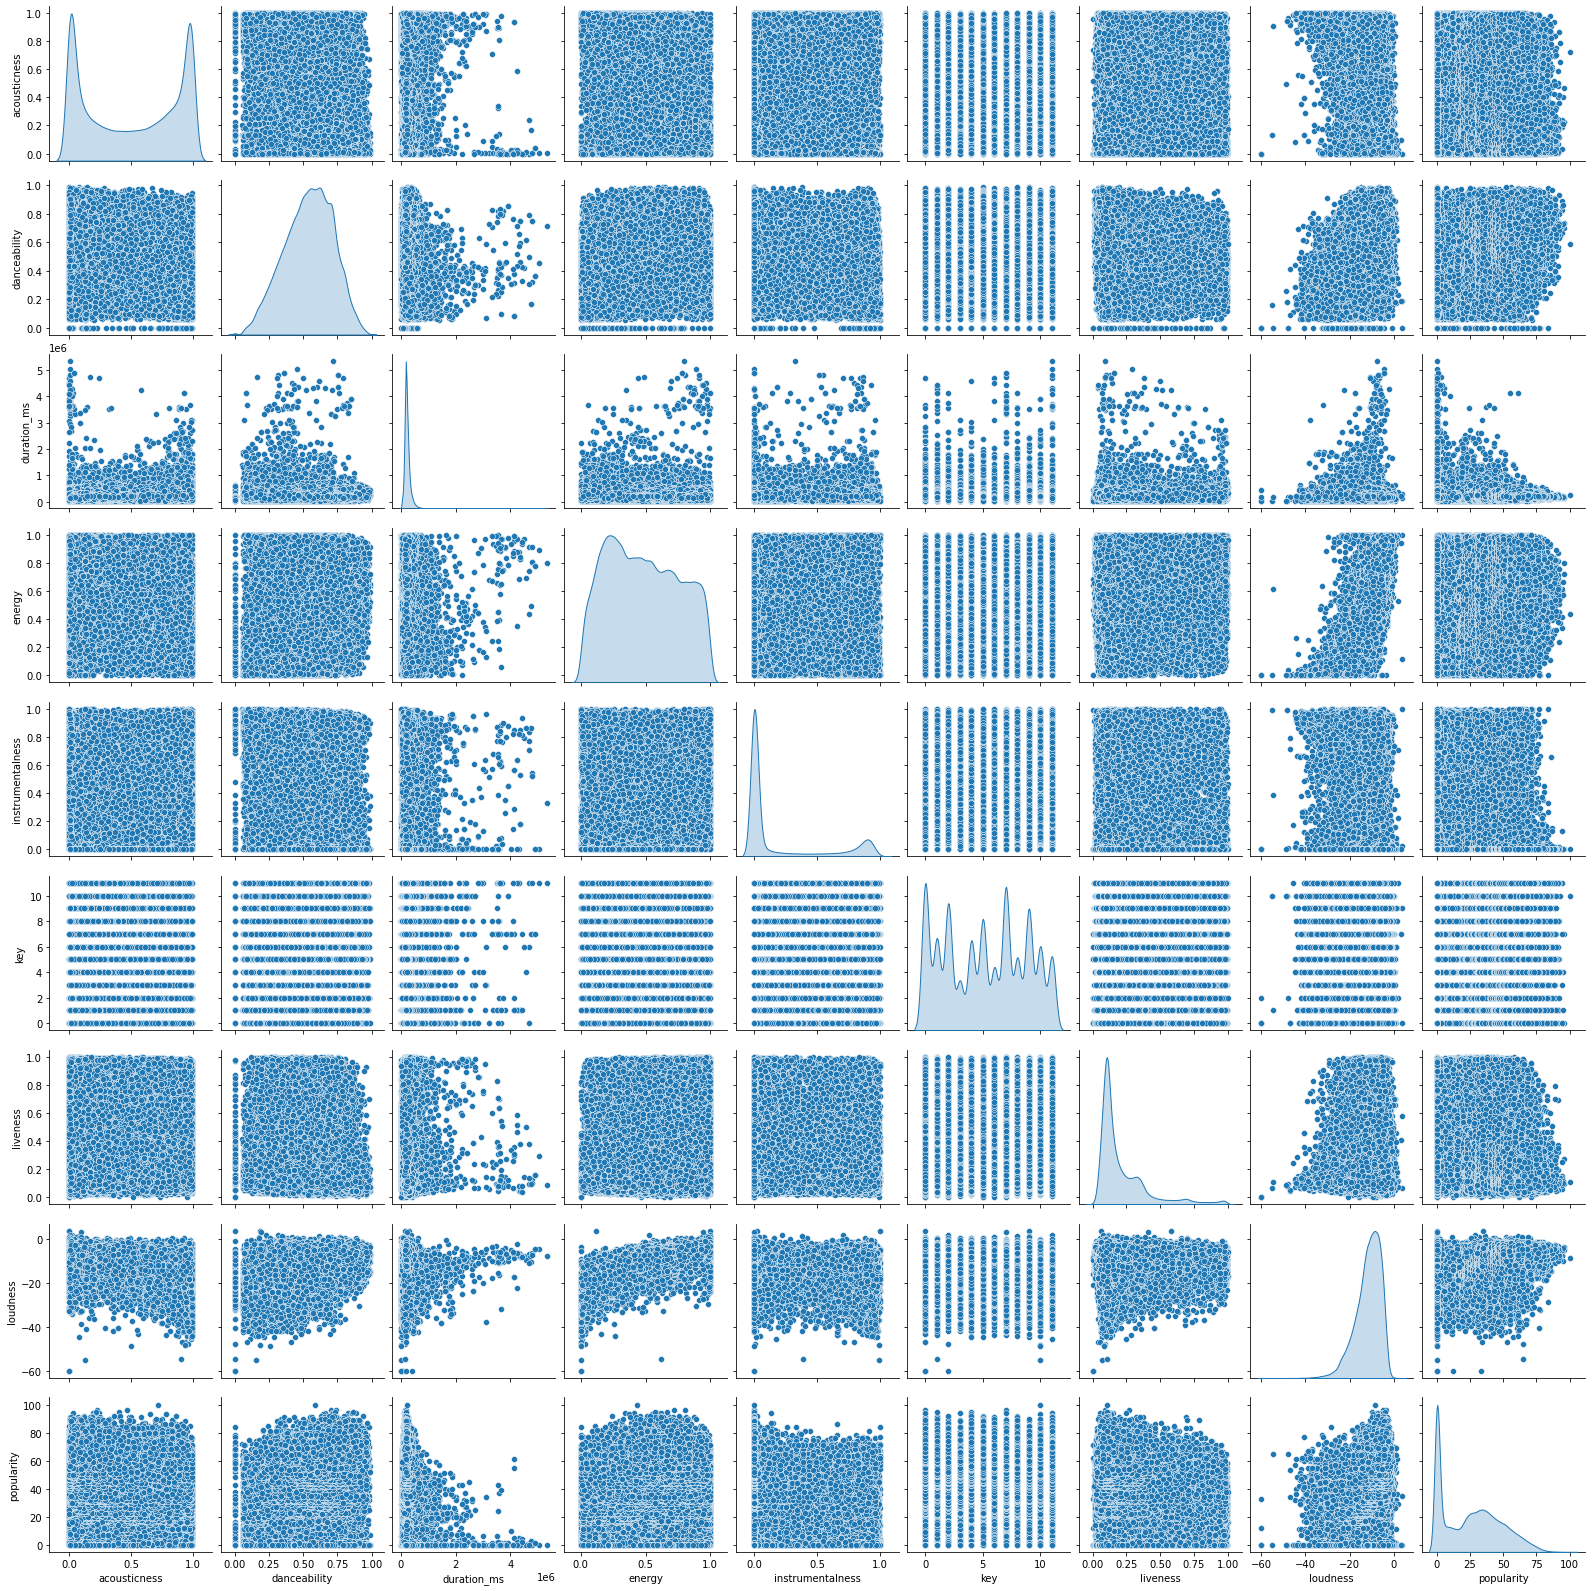

In [116]:
# Plot scatter matrix for each pair of variables off diagonal and the histograms (or density plots) on the diagonal
# In ggplot2 in R, one can use ggscatmat, which also prints the correlation in the upper triangle.
import seaborn as sns

cols = ['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness','popularity']
sns.pairplot(spotify[cols],diag_kind='kde') 

## Building CART Model

### Predict if the song is good
* A song is good if its popularity is greater than 25

In [83]:
from sklearn.model_selection import train_test_split
cols = ['acousticness', 'danceability', 'duration_ms', 'energy','explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 
       'tempo', 'valence', 'year_x', 'Collaboration', 'name_length', 'live',
        'live','love', 'mix', 'no', 'op', 'remast', 'version', 'year_y', 
       'Season_Fall', 'Season_Spring', 'Season_Summer', 'Season_Winter']

# re-split the dataset into training and testing data
y = spotify['popularity']
X = spotify[cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=88)
X_train.shape, X_test.shape

((116840, 29), (57549, 29))

In [84]:
y_train.mean(), y_train.max(), y_train.min()

(25.67584731256419, 100, 0)

(array([3.9388e+04, 1.0138e+04, 1.5827e+04, 1.8036e+04, 1.4227e+04,
        1.0394e+04, 6.0360e+03, 2.3960e+03, 3.7000e+02, 2.8000e+01]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.]),
 <BarContainer object of 10 artists>)

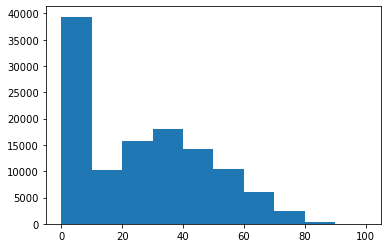

In [85]:
import matplotlib.pyplot as plt
plt.hist(y_train)

In [86]:
# convert the popularity to be 0 or 1
# 0 if the score is less than 85, else 1
y_train=pd.Series([1 if y_train.iloc[i]>=25 else 0 for i in range(len(y_train))], index=y_train.index)
y_test=pd.Series([1 if y_test.iloc[i]>=25 else 0 for i in range(len(y_test))], index=y_test.index)

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.1, 51)}

dtc = DecisionTreeClassifier(random_state=88)
dtc_cv = GridSearchCV(dtc, param_grid=grid_values, cv=5).fit(X_train, y_train)

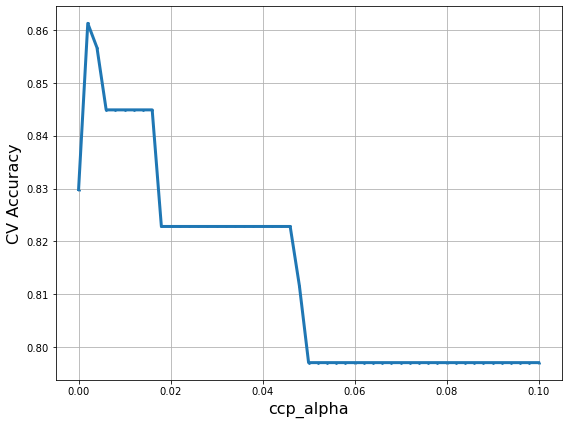

Best ccp_alpha {'ccp_alpha': 0.002}


In [37]:
ccp_alpha = dtc_cv.cv_results_['param_ccp_alpha'].data
ACC_scores = dtc_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV Accuracy', fontsize=16)
plt.scatter(ccp_alpha, ACC_scores, s=3)
plt.plot(ccp_alpha, ACC_scores, linewidth=3)
plt.grid(True, which='both')

plt.tight_layout()
plt.show()

print('Best ccp_alpha', dtc_cv.best_params_)

Node count = 23


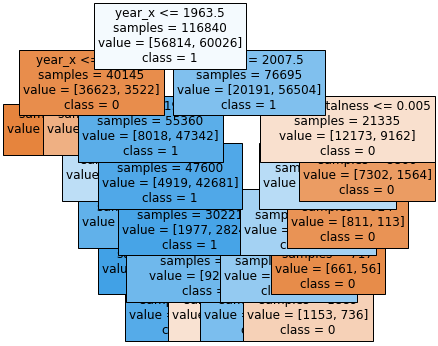

In [38]:
from sklearn.tree import plot_tree

print('Node count =', dtc_cv.best_estimator_.tree_.node_count)
plt.figure(figsize=(6,6))
plot_tree(dtc_cv.best_estimator_, 
          feature_names=X_train.columns, 
          class_names=['0','1'], 
          filled=True,
          impurity=False,
          fontsize=12) 
plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

# Compute the performance of the training set
y_pred = dtc_cv.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_train, y_pred))
print ("\nPrecision:", precision_score(y_train, y_pred))

Confusion Matrix: 
 [[47044  9770]
 [ 6373 53653]]

Accuracy: 0.861836699760356

Precision: 0.8459549374832473


In [40]:
# The performance of the test set
y_pred = dtc_cv.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix: \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

Confusion Matrix: 
 [[23145  4872]
 [ 3228 26304]]

Accuracy: 0.8592503779388


## Random Forest

In [109]:
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import KFold

rf = RandomForestRegressor(max_features=5, min_samples_leaf=5, 
                           n_estimators = 500, random_state=88, verbose=2)
rf.fit(X_train, y_train)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 500


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500
building tree 41 of 500
building tree 42 of 500
building tree 43 of 500


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.8min finished


RandomForestRegressor(max_features=5, min_samples_leaf=5, n_estimators=500,
                      random_state=88, verbose=2)

In [112]:
# Evaluate the model performance on the testing set
y_prob = rf.predict(X_test)
y_pred = pd.Series([1 if x >= 0.5 else 0 for x in y_prob])
cm = confusion_matrix(y_test, y_pred)
print ("Confusion Matrix : \n", cm)
print ("\nAccuracy:", accuracy_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Confusion Matrix : 
 [[23899  4118]
 [ 2527 27005]]

Accuracy: 0.8845331804201637


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    9.1s finished
